In [1]:
#1A
import pandas as pd
import numpy as np
from sklearn import cross_validation
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances
from pylab import *
%matplotlib inline

train = pd.read_csv('train.csv', index_col='label')

In [2]:
#define X and y
X = train.values
y = train.index.values

#### 1B -- Write a function to display a MNIST digit. Display one of each digit.

In [4]:
#display one digit
def ShowOneDigit(row):
    matshow(X[row].reshape(28,28), cmap='coolwarm')

In [3]:
#we will use this dictionary to display all 10 digits
digLoc={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
digit=0
idx=0
while (idx<len(y) and digit<11):
   if digit==y[idx] and digLoc[digit]==[]:
       digLoc[digit]=idx
       digit+=1
   idx+=1

In [6]:
#this function shows all ten digits
def ShowTenDigits(digLoc):
    fig=plt.figure()
    for key in digLoc:
        ShowOneDigit(digLoc[key])

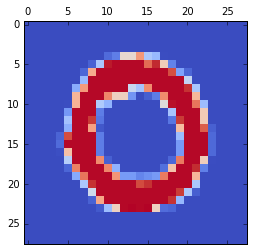

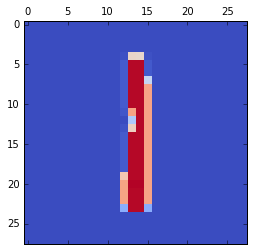

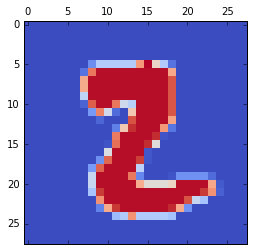

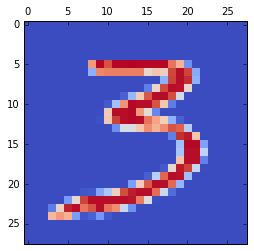

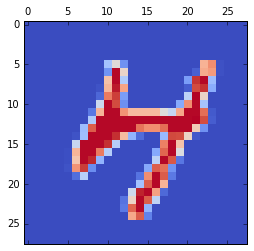

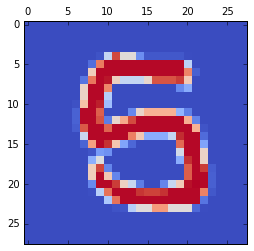

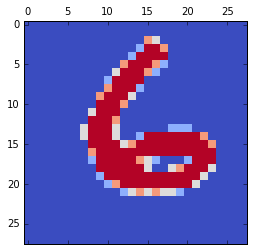

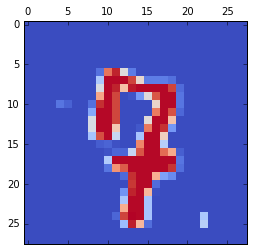

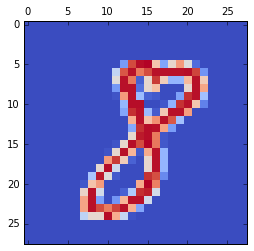

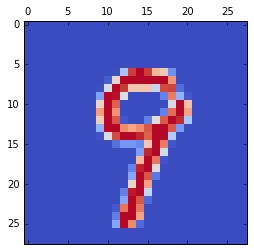

In [7]:
ShowTenDigits(digLoc)

#### 1C -- Examine the prior probability of the classes in the training data. Is it uniform across the digits? Display a normalized histogram of digit counts. Is it even?

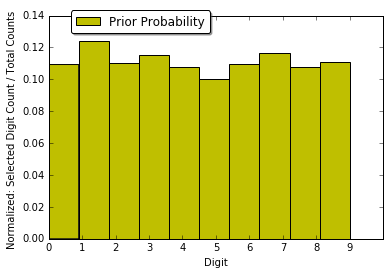

In [8]:
#http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.hist(y, normed=True, label='Prior Probability', color='y')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
plt.xlabel("Digit")
plt.ylabel("Normalized: Selected Digit Count / Total Counts ")
#http://matplotlib.org/api/pyplot_api.html
x_ticks = [0,1,2,3,4,5,6,7,8,9]
plt.gca().set_xticks(x_ticks)

#### 1D -- Nearest Neighbor Calculation

In [3]:
#http://stackoverflow.com/questions/17936587/in-numpy-find-euclidean-distance-between-each-pair-from-two-arrays
#this function calculates the euclidean distance between any two variables
def calculateDistance(vec1,vec2):
   distances = (vec1-vec2)**2
   distances = distances.sum()
   distances = np.sqrt(distances)
   return distances

In [10]:
#this function returns the closes digits to the ten we had chosen
def closestToInitialTen(digLoc, X, y):    
    digDict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
    indexDict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
    #iterate over all ten digits and the entire matrix values
    for i in digLoc:
        dis=0
        secondMinDistance=100000000
        minDistance=100000000
        secondMinIndex=0
        minIndex=0
        for j in range(len(y)):
            if j!=digLoc[i]:
                dis=calculateDistance(X[digLoc[i]],X[j])
                if dis < minDistance:
#                    secondMinDistance=minDistance
#                    secondMinIndex=minIndex
                    minIndex = j
                    minDistance=dis
        digDict[i]=y[minIndex]
        indexDict[i]=minIndex        
    return digDict, indexDict

In [11]:
digDic, digInd = closestToInitialTen(digLoc,X,y)

In [12]:
print ("Best matches to training data--all identical\n" + str(digDic))

Best matches to training data--all identical
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}


In [13]:
print("These are the indeces of the closest values to each digit:\n" + str(digInd) )

These are the indeces of the closest values to each digit:
{0: 12950, 1: 37217, 2: 9536, 3: 19858, 4: 22464, 5: 10674, 6: 40825, 7: 10350, 8: 9887, 9: 20857}


In [14]:
subset0=X[y[:]==0]

In [15]:
subset1=X[y[:]==1]

#### 1E -- Genuine vs. Imposter Calculations 

In [16]:
#create symetric  matrices representing distances between all genuine zeros, where the diagonal is 0 (same value)
gen0 = pairwise_distances(subset0,subset0)
gen1 = pairwise_distances(subset1,subset1)
#create matrix representing the distance between all 1s and all 0s
imp = pairwise_distances(subset0, subset1)

In [17]:
gen0DiffVals=[]
#create an array of the lower triangle of the genuine 0 matrices
for i in range(len(gen0)):
   for j in range(len(gen0)):
       if j>=i:
           continue
       else:
           gen0DiffVals.append(gen0[i][j])

In [14]:
#create an array of the lower triangle of the genuine 1 matrices 
gen1DiffVals=[]
for i in range(len(gen1)):
   for j in range(len(gen1)):
       if j>=i:
           continue
       else:
           gen1DiffVals.append(gen1[i][j])

In [15]:
#create a list of all pairwise distances between subset 0 to subset 1
imposterDiffVals=[]
for i in range(len(gen0)):
   for j in range(len(gen1)):
       imposterDiffVals.append(imp[i][j])

In [17]:
genTotalDiffVals = gen0DiffVals + gen1DiffVals

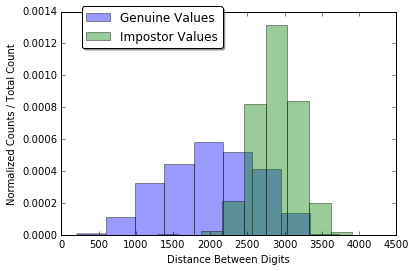

In [18]:
plt.hist(genTotalDiffVals,label='Genuine Values', alpha=.4, normed=True)
plt.hist(imposterDiffVals, label='Impostor Values', alpha=.4, normed=True)
plt.xlabel("Distance Between Digits")
plt.ylabel("Normalized Counts / Total Count")
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)

#### 1F ROC Curve

In [ ]:
gen=genTotalDiffVals
imp=imposterDiffVals

In [ ]:
def plot_ROC(genVec, impVec):
  zeroVec=[]
  oneVec=[]
  for i in range(len(genVec)):
     zeroVec.append(0)
  for i in range(len(impVec)):
     oneVec.append(1)
  y_true=zeroVec+oneVec
  y_score=genVec+impVec
  
  falsePos,truePos,thresh=metrics.roc_curve(y_true,y_score,pos_label=0)
  roc_auc=metrics.auc(truePos,falsePos)

#https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/

  plt.title('ROC Curve')
  plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
  plt.plot(truePos,falsePos)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.plot()

In [ ]:
plot_ROC(gen,imp)

#### 1G KNN Classifier 

In [ ]:
# Ryan Harrington's Machine Learning in Action, pp23
from collections import OrderedDict
def K_nearestNeighbors(vec, X, y, k):
    X_size = X.shape[0]
    diffMat = tile(vec,(X_size,1)) - X
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    classCount={}
    for i in range(1,k+1):
        voteIlabel = y[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

#### 1H & 1I Three-Fold Cross-Validation & Confusion Matrix

In [28]:
def getAccuracy(kf):
    # get accuracy of the KNN classifier in the cross-validation test
    train_i, test_i, k = kf
    X_train = X[train_i]
    X_test = X[test_i]
    y_train = y[train_i]
    y_test = y[test_i]
    classProblem=False
    correct = 0
    y_pred = []
    for i in range(0,len(X_test)):
        y_pred.append(K_nearestNeighbors(X_test[i],X_train,y_train,k))
        correct+= (y_pred[i]==y_test[i])
    cf=confusion_matrix(array(y_pred), y_test, labels=None)
    print (cf)
    print ("")
    for i in range(len(cf)):
        diagVal = cf[i][i]
        for j in range(len(cf[0])):
            if i!=j and ((cf[i][j]-diagVal)>diagVal/5):
                classProblem=True
                print ("digit " + str(i) + "could be problematic to classify")
    if not classProblem:
        print ("there were no tricky digits to classify")
        print("")
    return float(correct)/len(X_test)

In [ ]:
def CrossValidation_3fold(sampleSize):
    size = sampleSize #can be changed for testing
    minK=3
    maxK=4  #after testing, we found that k==3 yields for best accuracy
    totalacc=0
    print ("confusion matrices for each of the folds will follow")
    print ("")
    for train, test in (cross_validation.KFold(size, n_folds=3)):
        for k in range(minK,maxK):
            #print ("\n\nK is :", k)
            acc=getAccuracy([train,test,k])
            #print ("accuracy rate: " +str(acc)) #relevant for when testing different Ks
            if k==3:
                totalacc+=acc
    meanAcc=totalacc/float(3)
    print ("mean accuracy in 3-fold cross-validation is "+ str(meanAcc))
    return totalacc/float(3)

In [ ]:
accu=CrossValidation_3fold(len(X)) #the display is nested in a separate file; to see the print-out, check the pdf

#### 1J Train & Test Classifier

In [ ]:
testOpen = pd.read_csv('test.csv')
testX=testOpen.values

predicted_vec=[]
imageid=1

for i in range(0,len(testX)):
    number = int(K_nearestNeighbors(testX[i],X,y,3))
    predicted_vec.append(number)
    imageid+=1

output = pd.DataFrame({'ImageId': imageid, 'Label': predicted_vec})
f = "Kaggle_submission" + str(len(predicted_vec)) + '.csv' 
output.to_csv(f, index=False)
print (output)